In [1]:
import pandas as pd
import numpy as np
import sys
import statsmodels
import prince

import matplotlib.pyplot as plt
import seaborn as sns

import plotly as ply
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import plotly.express as px

sns.set_theme(style="darkgrid")

In [3]:
data = pd.read_csv('/Users/lucas/Desktop/Polytech/IG4/S7/projet_DS/mail_clean.csv')

In [4]:
df = data
print(df.columns)
df.head()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'DayWeek', 'Message-ID', 'Date', 'From',
       'To', 'Subject', 'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder',
       'X-Origin', 'X-FileName', 'content', 'user', 'Cat_1_level_1',
       'Cat_1_level_2', 'Cat_1_weight', 'Cat_2_level_1', 'Cat_2_level_2',
       'Cat_2_weight', 'Cat_3_level_1', 'Cat_3_level_2', 'Cat_3_weight',
       'Cat_4_level_1', 'Cat_4_level_2', 'Cat_4_weight', 'Cat_5_level_1',
       'Cat_5_level_2', 'Cat_5_weight', 'Cat_6_level_1', 'Cat_6_level_2',
       'Cat_6_weight', 'Cat_7_level_1', 'Cat_7_level_2', 'Cat_7_weight',
       'Cat_8_level_1', 'Cat_8_level_2', 'Cat_8_weight', 'Cat_9_level_1',
       'Cat_9_level_2', 'Cat_9_weight', 'Cat_10_level_1', 'Cat_10_level_2',
       'Cat_10_weight', 'labeled', 'Years', 'Month', 'Day', 'Hours',
       'content_char_len', 'content_char_length_category', 'content_word_len',
       'content_word_length_category', 'To_count'],
      dtype='object')


,Unnamed: 0,Unnamed: 0.1,DayWeek,Message-ID,Date,From,To,Subject,X-From,X-To,...,labeled,Years,Month,Day,Hours,content_char_len,content_char_length_category,content_word_len,content_word_length_category,To_count
0,0,0,0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 23:39:00,frozenset({'phillip.allen@enron.com'}),['tim.belden@enron.com'],No subject,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,...,False,2001,5,14,23,20,1,4,1,1
1,1,1,4,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 20:51:00,frozenset({'phillip.allen@enron.com'}),['john.lavorato@enron.com'],Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,...,False,2001,5,4,20,773,2,138,2,1
2,2,2,2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 10:00:00,frozenset({'phillip.allen@enron.com'}),['leah.arsdall@enron.com'],Re: test,Phillip K Allen,Leah Van Arsdall,...,False,2000,10,18,10,29,1,5,1,1
3,3,3,0,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 13:13:00,frozenset({'phillip.allen@enron.com'}),['randall.gay@enron.com'],No subject,Phillip K Allen,Randall L Gay,...,False,2000,10,23,13,180,1,34,1,1
4,4,4,3,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 12:07:00,frozenset({'phillip.allen@enron.com'}),['greg.piper@enron.com'],Re: Hello,Phillip K Allen,Greg Piper,...,False,2000,8,31,12,33,1,4,1,1


In [4]:
df[['To_count','content_char_len','content_word_len']].describe()

,To_count,content_char_len,content_word_len
count,100000.000000,100000.000000,100000.000000
mean,7.250530,2158.971240,296.217970
std,24.734084,7370.232522,1034.192824
min,0.000000,1.000000,0.000000
25%,1.000000,272.000000,38.000000
50%,1.000000,758.000000,105.000000
75%,2.000000,1854.000000,253.000000
max,881.000000,260461.000000,38084.000000


- Categorical features: 
    - <b>Years</b>
    - <b>Month</b>
    - <b>DayWeek</b>
    - <b>Hours</b>
    - <b>From</b>
    - <b>To</b>
    - tous les <b>Cat_i_level_i</b>
    - <b>content_char_length_category</b>
    - <b>content_word_length_category</b>
    
    
    
- Continous features:
    - <b>To_count</b>
    - <b>content_char_len</b>
    - <b>content_word_len</b>
    
    
- Others:
    - <b>content</b>

<br>
<h3>I - La categorie <b>'Years'</b>, la classe qui nous intéresse.</h3>

Rappelons la distribution du de la longueur du contenu avec sa variable categorique et sa variable continue

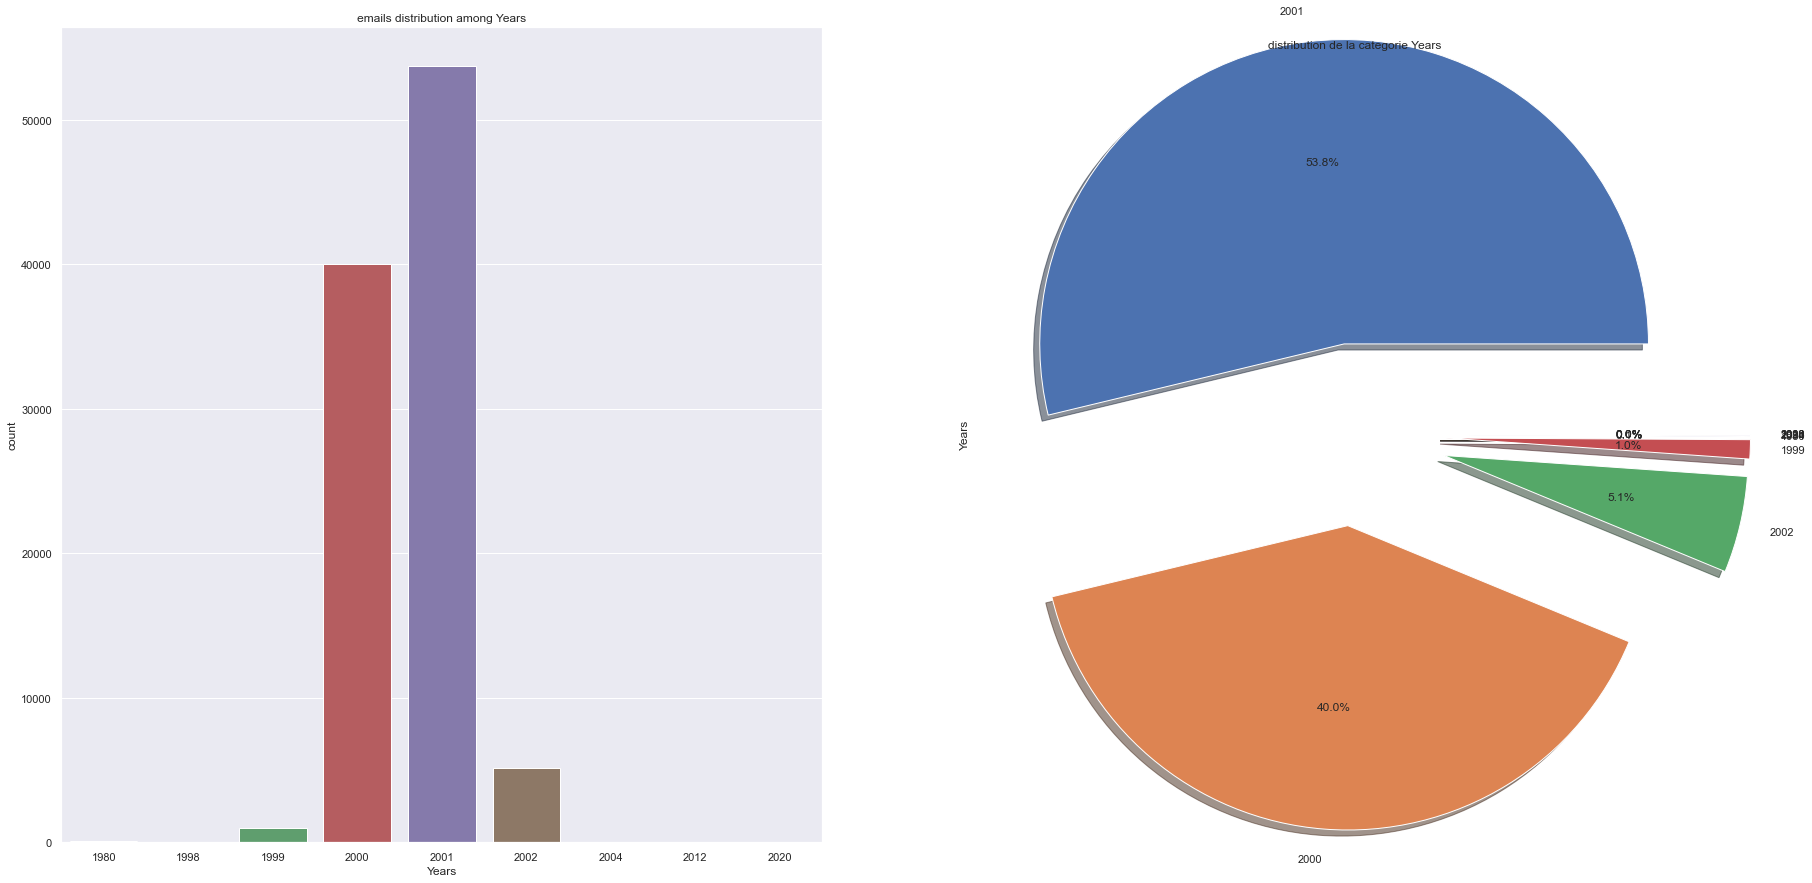

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(30,15))
content_char_len = df['Years'].values

sns.countplot(x='Years', data=df, ax=ax1)
ax1.set_title('emails distribution among Years')

df['Years'].value_counts().plot.pie(explode=[0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3],autopct='%1.1f%%',ax=ax2,shadow=True)
ax2.set_title('distribution de la categorie Years')
plt.show()

Il semblerait qu'il y ai des années où il y a vraiment très peu de mail, cela mérite d'approfondir un peu plus les données.

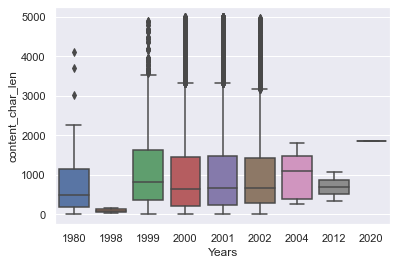

In [5]:
sns.boxplot(data=df[df['content_char_len']<5000], x="Years", y="content_char_len")
plt.show()

In [7]:
df['Years'].value_counts()

2001    53758
2000    40012
2002     5127
1999     1016
1980       75
2004        6
2020        2
2012        2
1998        2
Name: Years, dtype: int64

En 1998, 2004, 2012 et 2020, il y a moins de 10 mails envoyés. L' entreprise enron n'est plus en activité depuis 2001 suite à une faillite, par conséquent, les mails après 2002 ne sont pas intéressant pour nous. (Si nous regardons en précision le contenu, il ne s'agit que de pub/spam).

Regardons le contenu des mails de <b>1998</b>:

In [8]:
df_1998 = df[df['Years']==1998]

for index, row in df_1998.iterrows():
    print('-'*100)
    print('From: ', row['From'])
    print(row['content'])

----------------------------------------------------------------------------------------------------
From:  frozenset({'bruno.gaillard@enron.com'})
Ignor previous message again
----------------------------------------------------------------------------------------------------
From:  frozenset({'jeff.dasovich@enron.com'})
When: Monday, December 07, 1998 10:30 AM-12:00 PM (GMT-08:00) Pacific Time (US & Canada); Tijuana. Where: 2131 Walnut Grove Avenue, Rosemead, CA GO#3; Conf. Room 396


- Les deux mails sont envoyé par deux personnes de l'entreprise Enron dont <b> Jeff Dasovich</b> qui semble être à un poste important de l'entreprise (voir plus bas). 

- Cependant, le contenu ne nous apporte <b>aucune information</b>. 

- Si notre but est de classifier des mails en <b>fonction des années</b>, cela peut nous poser un problème car il y a trop peu de données. Il existe divers méthodes pour gérer une classe avec peu de données:
    - On peut utiliser un <b>SMOTE</b> algorithm.
    - Ou alors un <b>NearMiss</b> algorithm.
    - Cependant, avec <b>seulement 2 rows</b> ces algorithmes ne pourront pas nous aider à faire face à l'immense quantité de données des autres classes.
    
    - Il serait donc <b>préférable</b> de ne pas prendre en compte l'année 1998 pour l'instant jusqu'à avoir des données <b>complémentaire</b> sur l'année 1998.

In [21]:
df = df[~((df.Years == 1998) | (df.Years == 2004) | (df.Years == 2012) |(df.Years == 2020))]
df['Years'].value_counts()

2001    53758
2000    40012
2002     5127
1999     1016
1980       75
Name: Years, dtype: int64

<br>
<h4>a - La temporalité </h4>

<br>

- En fonction de <b>DayWeek</b>

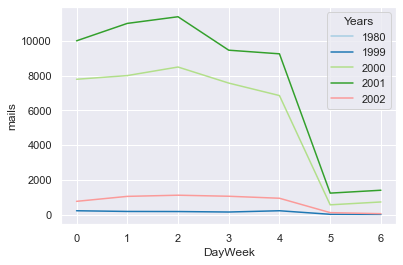

In [22]:
df_temp = df[['DayWeek','Years']].groupby(['DayWeek','Years']).size().to_frame('mails').reset_index()
sns.lineplot(data=df_temp, x='DayWeek', y='mails', hue='Years',palette='Paired' )
plt.show()



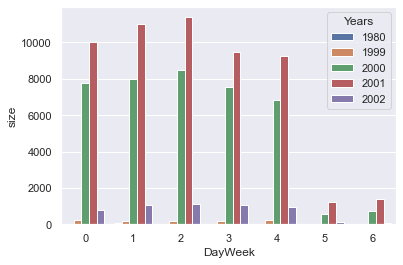

In [23]:
barp = df[['DayWeek', 'Years']].groupby(['DayWeek', 'Years']).size().to_frame('size').reset_index()

sns.barplot(x='DayWeek',y='size', data=barp, hue='Years')
plt.show()

Il semblerait que tous les mails de l'année <b>1980</b> on été envoyé un <b>mardi</b>, c'est peut être d'ailleurs le <b>même mardi</b>, regardons ça.

In [24]:
df_1980 = df[df['Years'] == 1980]
df_1980[['Years','Month','Day','DayWeek','Hours']].groupby(['Years','Month','Day','DayWeek','Hours']).size()


Years  Month  Day  DayWeek  Hours
1980   1      1    1        0        75
dtype: int64

C'est désormais une certitude, <b>tous les mails de 1980</b> ont été envoyés le même jour et à la même heure. On peut remarquer la date <b>01/01/01 à la première heure</b>. Regardons leur contenu pour avoir plus de précision:

In [13]:
for index, row in df_1980[50:60].iterrows():
    print('-'*100)
    print('From: ', row['From'])
    print(row['content'])

----------------------------------------------------------------------------------------------------
From:  frozenset({'rick.buy@enron.com'})
To register your Palm Computingc organizer electronically, you must have an Internet connection or a modem connected to your computer. Or if you prefer, you can fill out and send the mail-in registration card included in your Palm Computing package. Special rewards only for registered users: -FREE software programs * -FREE technical support ** -Upgrade information -Important updates * For a complete list of free software, go to www.palm.com/eregdownload ** Subject to change without notice
----------------------------------------------------------------------------------------------------
From:  frozenset({'rick.buy@enron.com'})
To register your Palm Computingc organizer electronically, you must have an Internet connection or a modem connected to your computer. Or if you prefer, you can fill out and send the mail-in registration card included in y

- Le contenu semble parfaitement normal, la date doit sans doute être une <b>erreur</b>.

- Par ailleurs, si l'on regarde précisement le <b>contenu</b> des mails, on peut voir la <b>vraie date</b> de certains mails où il y a marqué <b>2001 pour le 55ème mail</b> par exemple.

- Nous avons donc ici plusieurs problème:

    - La date de certains mails n'est pas la bonne, peut être même tous.
    - Il semble compliqué de déterminer la vraie date des mails avec seulement le contenu pour certains mails.
    
- Un choix s'impose:
    - Nous pouvons ne pas prendre en compte ces mails.
    - Où trouver une solution pour intégrer ces mails à leur vraie date.
    - Le problème est qu'il est fort probable que ces mails ne soit pas du tout de l'année 1980. En effet, la <b>démocratisation de l'envoie d'emain dans les institutions date de 1985</b>. Nous allons donc nous passer de ces données.
    


In [25]:
df = df[~((df.Years == 1980))]
df['Years'].value_counts()

2001    53758
2000    40012
2002     5127
1999     1016
Name: Years, dtype: int64

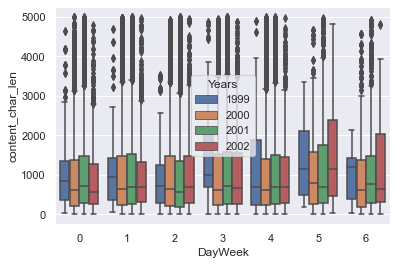

In [26]:
sns.boxplot(data=df[df['content_char_len']<5000], x="DayWeek", y="content_char_len", hue='Years')
plt.show()


<br>

- En fonction de la temporalité <b>Hours</b>

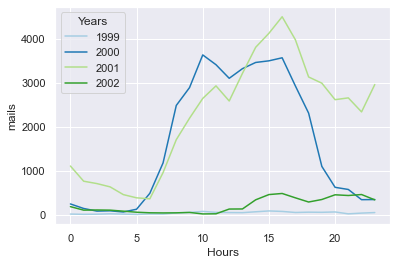

In [32]:
df_temp = df[['Hours','Years']].groupby(['Hours','Years']).size().to_frame('mails').reset_index()

sns.lineplot(data=df_temp, x='Hours', y='mails', hue='Years',palette='Paired' )
plt.show()

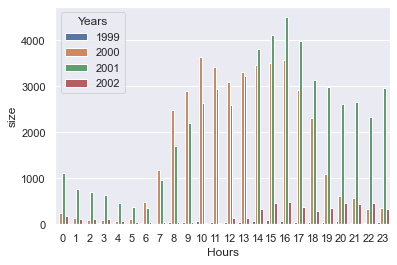

In [34]:
barp = df[['Hours', 'Years']].groupby(['Hours', 'Years']).size().to_frame('size').reset_index()

sns.barplot(x='Hours',y='size', data=barp, hue='Years')
plt.show()



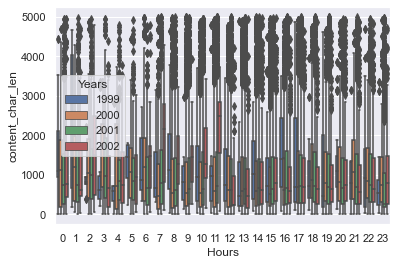

In [27]:
sns.boxplot(data=df[df['content_char_len']<5000], x="Hours", y="content_char_len", hue='Years')
plt.show()



<br>

- En fonction de la temporalité <b>Day</b>

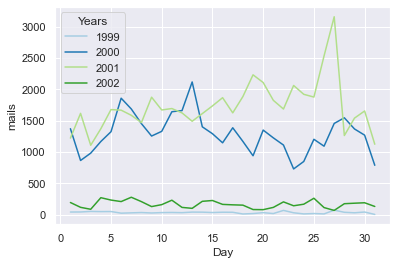

In [36]:
df_temp = df[['Day','Years']].groupby(['Day','Years']).size().to_frame('mails').reset_index()


sns.lineplot(data=df_temp, x='Day', y='mails', hue='Years',palette='Paired' )
plt.show()



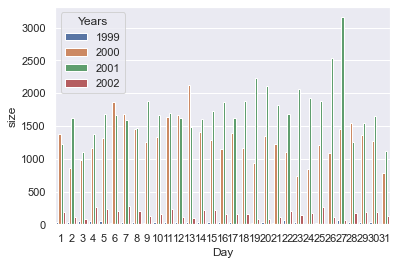

In [39]:
barp = df[['Day', 'Years']].groupby(['Day', 'Years']).size().to_frame('size').reset_index()

sns.barplot(x='Day',y='size', data=barp, hue='Years')
plt.show()



<br>

- En fonction de <b>Month</b>

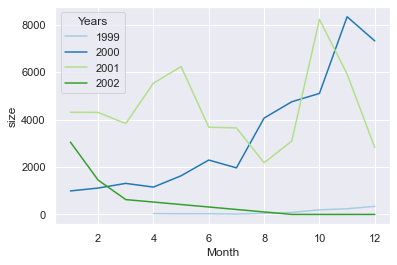

In [41]:
df_temp = df[['Month','Years']].groupby(['Month','Years']).size().to_frame('size').reset_index()
sns.lineplot(data=df_temp, x='Month', y='size', hue='Years',palette='Paired' )
plt.show()



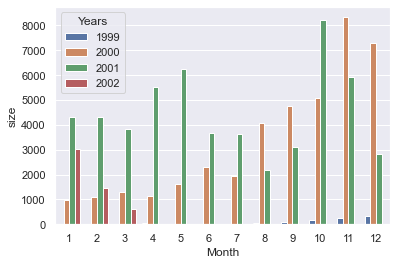

In [43]:
barp = df[['Month', 'Years']].groupby(['Month', 'Years']).size().to_frame('size').reset_index()

sns.barplot(x='Month',y='size', data=barp, hue='Years')
plt.show()

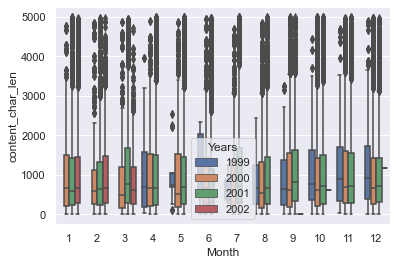

In [31]:
sns.boxplot(data=df[df['content_char_len']<5000], x="Month", y="content_char_len", hue='Years')
plt.show()



<b> b - From </b>

Parmi ceux qui envoie le plus de mail, quelle est la distribution de la longueur des mails pour chaque personne?

In [44]:
user = df.From.unique()
counter_user = []

for i in user:
    counter = 0
    for j in df['From']:
        if  i == j:
            counter += 1
    counter_user.append(counter)
    

user_sorted = sorted(list(zip(counter_user, user)), reverse = True)[0:10]

nb_mail, user = zip(*user_sorted)

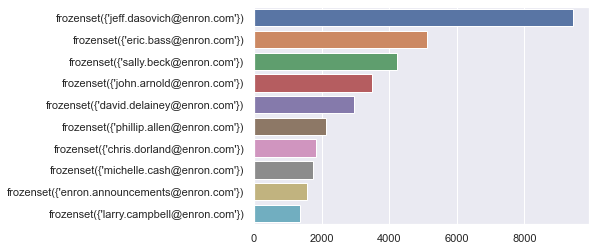

In [45]:

sns.barplot(x=list(nb_mail) ,y=list(user), orient='h')
plt.show()


In [46]:
count = [1 for i in range(0,len(df.From))]


data_user_cat = df[['From', 'Years']]
data_user_cat['count'] = count

sum_by_cat = data_user_cat.groupby(['From','Years']).sum().reset_index()

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [47]:
for index, row in sum_by_cat.iterrows():
    if row['From'] not in user:

        sum_by_cat.drop(index, inplace=True)
        
#On convertit au format string sinon express interpretera comme valeur continue.
sum_by_cat['Years'] = sum_by_cat['Years'].astype(str)

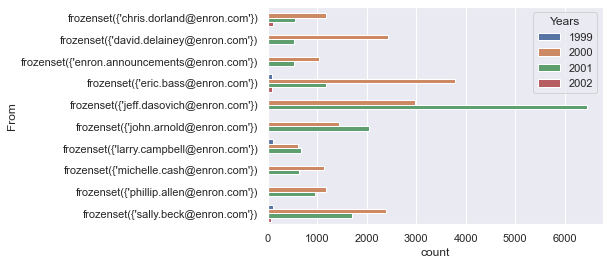

In [48]:
sns.barplot(data=sum_by_cat,x='count', y='From', hue='Years' )
plt.show()



<h4>c - Cat Message categorie</h4>

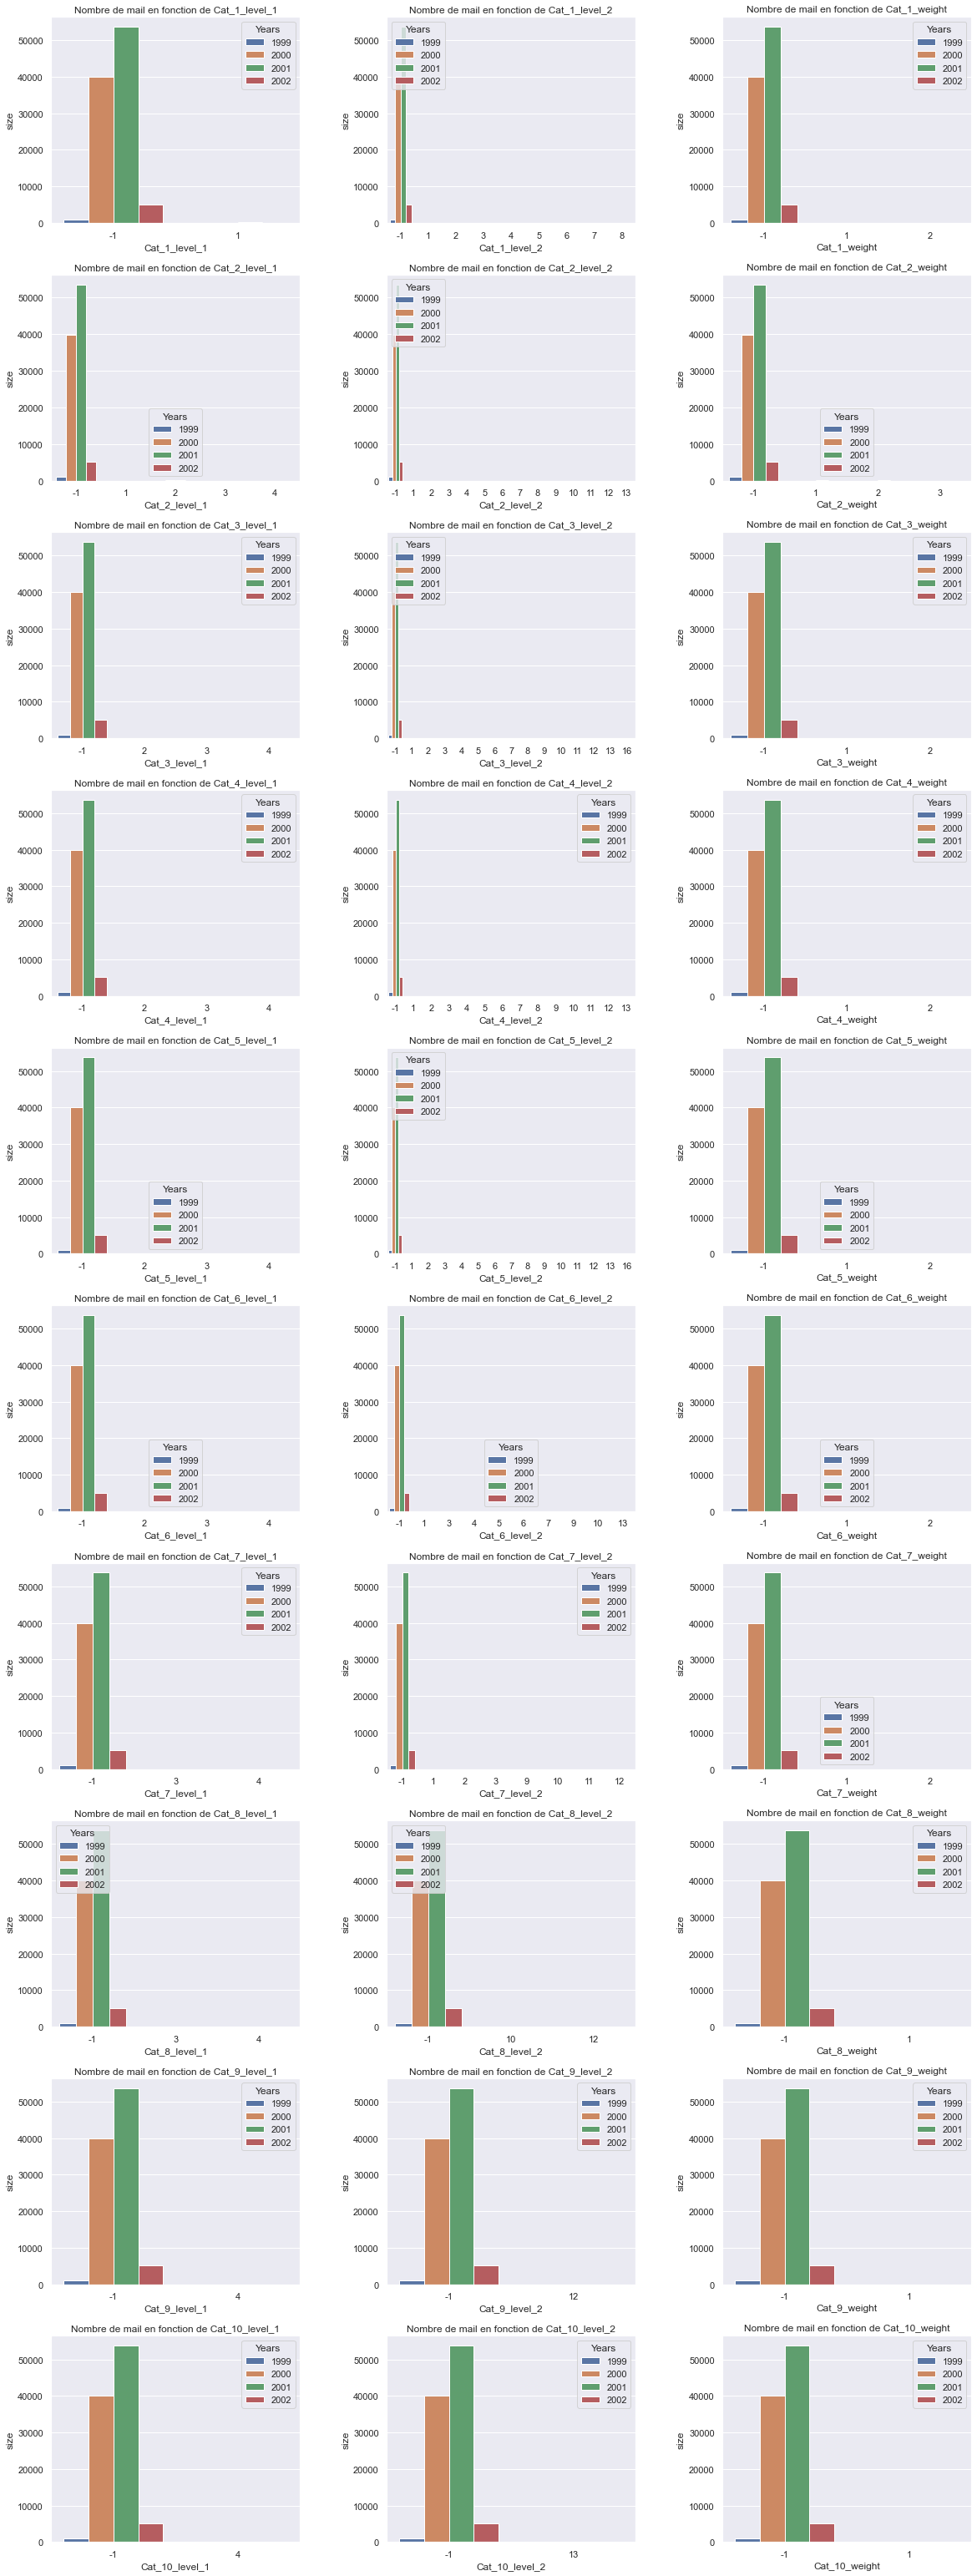

In [30]:
categories = ['Cat_1_level_1',
       'Cat_1_level_2', 'Cat_1_weight', 'Cat_2_level_1', 'Cat_2_level_2',
       'Cat_2_weight', 'Cat_3_level_1', 'Cat_3_level_2', 'Cat_3_weight',
       'Cat_4_level_1', 'Cat_4_level_2', 'Cat_4_weight', 'Cat_5_level_1',
       'Cat_5_level_2', 'Cat_5_weight', 'Cat_6_level_1', 'Cat_6_level_2',
       'Cat_6_weight', 'Cat_7_level_1', 'Cat_7_level_2', 'Cat_7_weight',
       'Cat_8_level_1', 'Cat_8_level_2', 'Cat_8_weight', 'Cat_9_level_1',
       'Cat_9_level_2', 'Cat_9_weight', 'Cat_10_level_1', 'Cat_10_level_2',
       'Cat_10_weight']

f,ax=plt.subplots(10, 3,figsize=(18,50))

j = 0
for i in range(0, 10):
    
    sns.barplot(x=categories[j],y='size',hue='Years',data=df[[categories[j],'Years']].groupby([categories[j],'Years']).size().to_frame('size').reset_index(),ax=ax[i][0])
    ax[i][0].set_title('Nombre de mail en fonction de '+ categories[j])
    
    sns.barplot(x=categories[j+1],y='size',hue='Years',data=df[[ categories[j+1],'Years']].groupby([categories[j+1],'Years']).size().to_frame('size').reset_index(),ax=ax[i][1])
    ax[i][1].set_title('Nombre de mail en fonction de '+ categories[j+1])
    
    sns.barplot(x=categories[j+2],y='size',hue='Years',data=df[[ categories[j+2],'Years']].groupby([categories[j+2],'Years']).size().to_frame('size').reset_index(),ax=ax[i][2])
    ax[i][2].set_title('Nombre de mail en fonction de '+ categories[j+2])
    
    j += 3

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

<h3>II - Continuous features</h3>

- To_count

In [49]:
from sklearn import preprocessing
x = df[['content_char_len','To_count']].values


min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=['content_char_len_scaled','To_count_scaled'])
df_scaled = pd.concat([df,df_scaled],axis=1, join='inner')
df_scaled

,Unnamed: 0,Unnamed: 0.1,DayWeek,Message-ID,Date,From,To,Subject,X-From,X-To,...,Month,Day,Hours,content_char_len,content_char_length_category,content_word_len,content_word_length_category,To_count,content_char_len_scaled,To_count_scaled
0,0,0,0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 23:39:00,frozenset({'phillip.allen@enron.com'}),['tim.belden@enron.com'],No subject,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,...,5,14,23,20,1,4,1,1,0.000073,0.001135
1,1,1,4,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 20:51:00,frozenset({'phillip.allen@enron.com'}),['john.lavorato@enron.com'],Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,...,5,4,20,773,2,138,2,1,0.002964,0.001135
2,2,2,2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 10:00:00,frozenset({'phillip.allen@enron.com'}),['leah.arsdall@enron.com'],Re: test,Phillip K Allen,Leah Van Arsdall,...,10,18,10,29,1,5,1,1,0.000108,0.001135
3,3,3,0,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 13:13:00,frozenset({'phillip.allen@enron.com'}),['randall.gay@enron.com'],No subject,Phillip K Allen,Randall L Gay,...,10,23,13,180,1,34,1,1,0.000687,0.001135
4,4,4,3,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 12:07:00,frozenset({'phillip.allen@enron.com'}),['greg.piper@enron.com'],Re: Hello,Phillip K Allen,Greg Piper,...,8,31,12,33,1,4,1,1,0.000123,0.001135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99908,99908,99908,0,<28051829.1075854172322.JavaMail.evans@thyme>,2000-02-07 07:18:00,frozenset({'daren.farmer@enron.com'}),['mam@teamlead.com'],RE:,Daren J Farmer,"""Mauldin, Mike"" <mam@teamlead.com>",...,2,7,7,134,1,23,1,1,0.005245,0.001135
99909,99909,99909,4,<27321147.1075854172344.JavaMail.evans@thyme>,2000-02-04 17:23:00,frozenset({'daren.farmer@enron.com'}),['mam@teamlead.com'],No subject,Daren J Farmer,Mam@teamlead.com,...,2,4,17,209,1,35,1,1,0.001866,0.001135
99910,99910,99910,4,<27682960.1075854172365.JavaMail.evans@thyme>,2000-02-04 17:16:00,frozenset({'daren.farmer@enron.com'}),['jackie.young@enron.com'],Re: 98-1534,Daren J Farmer,Jackie Young,...,2,4,17,365,2,54,2,1,0.001532,0.001135
99911,99911,99911,4,<1755875.1075854172386.JavaMail.evans@thyme>,2000-02-04 17:06:00,frozenset({'daren.farmer@enron.com'}),['aimee.lannou@enron.com'],Re: Meter 7266,Daren J Farmer,Aimee Lannou,...,2,4,17,165,1,28,1,1,0.007425,0.001135


- En fonction de la temporalité <b>DayWeek</b>.

In [50]:
df_scaled['Years'].value_counts()

2001    53757
2000    39938
2002     5127
1999     1004
Name: Years, dtype: int64

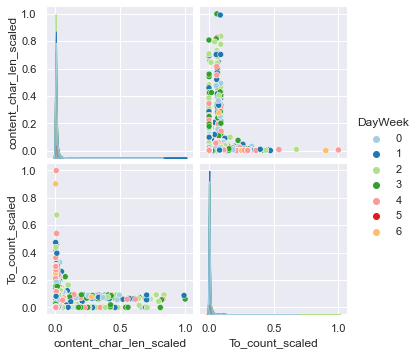

In [61]:
sns.pairplot(df_scaled, vars=['content_char_len_scaled', 'To_count_scaled'], hue='DayWeek', palette='Paired')

plt.show()

- En fonction de <b>Hours</b>

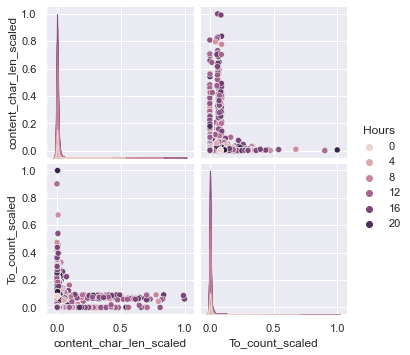

In [59]:
sns.pairplot(df_scaled,vars=['content_char_len_scaled', 'To_count_scaled'], hue='Hours' )
plt.show()

- En fonction de <b>Month</b>

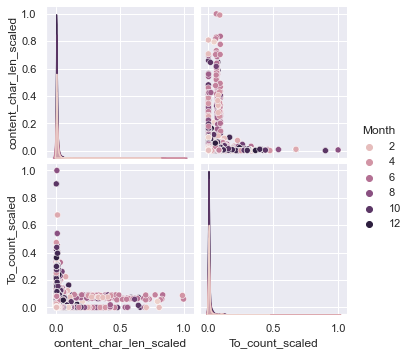

In [60]:
sns.pairplot(df_scaled,vars=['content_char_len_scaled', 'To_count_scaled'], hue='Month' )
plt.show()

- En fonction de <b> Years</b>

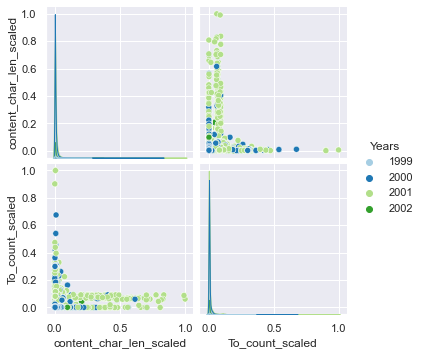

In [64]:
sns.pairplot(df_scaled,vars=['content_char_len_scaled', 'To_count_scaled'], hue='Years', palette='Paired')
plt.show()

In [37]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'DayWeek', 'Message-ID', 'Date', 'From',
       'To', 'Subject', 'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder',
       'X-Origin', 'X-FileName', 'content', 'user', 'Cat_1_level_1',
       'Cat_1_level_2', 'Cat_1_weight', 'Cat_2_level_1', 'Cat_2_level_2',
       'Cat_2_weight', 'Cat_3_level_1', 'Cat_3_level_2', 'Cat_3_weight',
       'Cat_4_level_1', 'Cat_4_level_2', 'Cat_4_weight', 'Cat_5_level_1',
       'Cat_5_level_2', 'Cat_5_weight', 'Cat_6_level_1', 'Cat_6_level_2',
       'Cat_6_weight', 'Cat_7_level_1', 'Cat_7_level_2', 'Cat_7_weight',
       'Cat_8_level_1', 'Cat_8_level_2', 'Cat_8_weight', 'Cat_9_level_1',
       'Cat_9_level_2', 'Cat_9_weight', 'Cat_10_level_1', 'Cat_10_level_2',
       'Cat_10_weight', 'labeled', 'Years', 'Month', 'Day', 'Hours',
       'content_char_len', 'content_char_length_category', 'content_word_len',
       'content_word_length_category', 'To_count'],
      dtype='object')

In [39]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','Message-ID', 'X-From', 'X-To', 'X-cc',
                'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName','labeled' ])

In [40]:
df.to_csv('/Users/lucas/Desktop/Polytech/IG4/S7/projet_DS/mail_clean_EDA.csv',index=False )